# 1.Importing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel("Candidate Pseudo Data.xlsx")

In [3]:
df.head()

,Unnamed: 0,Name,Experience,Location,Skills (Perc),Resume Score
0,NaN,Alexa George,5,644,56,81
1,NaN,Hope Schroeder,4,673,20,11
2,NaN,Emanuel Snyder,9,614,98,3
3,NaN,Elisa Poole,12,540,47,76
4,NaN,Alisson Allison,0,953,15,24


In [4]:
df=df.iloc[:,1:]

In [5]:
df.head()

,Name,Experience,Location,Skills (Perc),Resume Score
0,Alexa George,5,644,56,81
1,Hope Schroeder,4,673,20,11
2,Emanuel Snyder,9,614,98,3
3,Elisa Poole,12,540,47,76
4,Alisson Allison,0,953,15,24


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           30 non-null     object
 1   Experience     30 non-null     int64 
 2   Location       30 non-null     int64 
 3   Skills (Perc)  30 non-null     int64 
 4   Resume Score   30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [7]:
df.describe()

,Experience,Location,Skills (Perc),Resume Score
count,30.000000,30.000000,30.000000,30.00000
mean,5.933333,477.866667,44.066667,54.00000
std,3.675955,275.514783,27.314179,34.19518
min,0.000000,15.000000,0.000000,0.00000
25%,3.000000,247.250000,25.250000,21.75000
50%,5.500000,539.500000,38.000000,59.00000
75%,8.750000,667.250000,63.000000,84.00000
max,12.000000,953.000000,98.000000,99.00000


# 2.Visualizing the dataset

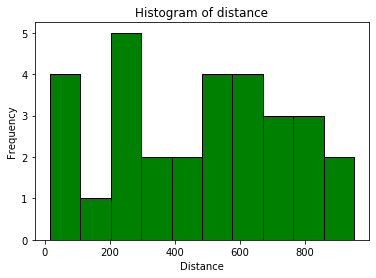

In [8]:
plt.hist(df['Location'],color='green',edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title("Histogram of distance")
plt.show()

The distanc between 200-300 km is repeated the most

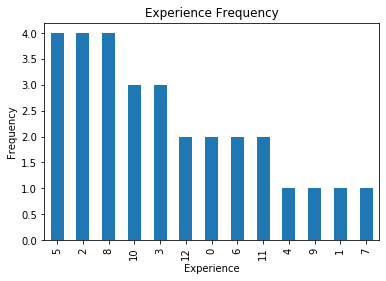

In [9]:
df['Experience'].value_counts().plot(kind='bar')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.title('Experience Frequency')
plt.show()

Most people who applied in this group have 5,2 and 8 years respectively

## Checking correaltion between the variables

In [10]:
cor=df.corr()

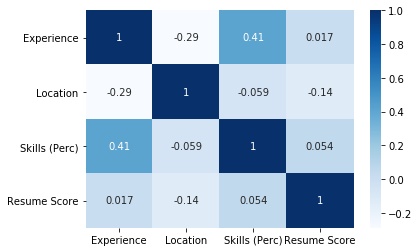

In [11]:
sns.heatmap(cor,annot=True,cmap='Blues')
plt.show()

Nothing valuable can be inferred from this heatmap.

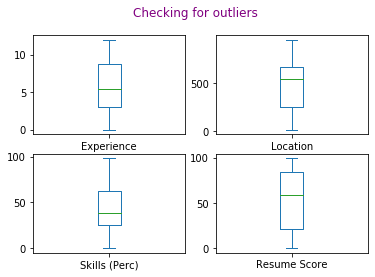

In [83]:

plt.suptitle("Checking for outliers",color='Purple')

plt.subplot(2,2,1)
df['Experience'].plot(kind='box')

plt.subplot(2,2,2)
df['Location'].plot(kind='box')

plt.subplot(2,2,3)
df['Skills (Perc)'].plot(kind='box')

plt.subplot(2,2,4)                        
df['Resume Score'].plot(kind='box')

plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
num=df[['Experience', 'Location', 'Skills (Perc)', 'Resume Score']]

#Numeric variables

In [15]:
df1=scaler.fit_transform(num)

In [16]:
df1=pd.DataFrame(df1)

In [17]:
df1=df1.rename({0:'Experience',1:'Location',2:'Skills',3:'ResumeScore'},axis=1)

In [18]:
df1.head()

,Experience,Location,Skills,ResumeScore
0,-0.258243,0.613301,0.444360,0.803083
1,-0.534932,0.720358,-0.896168,-1.278984
2,0.848512,0.502552,2.008310,-1.516935
3,1.678578,0.229373,0.109228,0.654364
4,-1.641686,1.754011,-1.082352,-0.892315


# 3. Modelling

In [19]:
from sklearn.cluster import KMeans

- Picking an arbitary number for k-means to set centroid

In [20]:
kmeans=KMeans(n_clusters=3,max_iter=50)

In [21]:
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### The algorithm has made 3 clusters here

In [22]:
kmeans.labels_

array([1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 0, 1, 1, 0, 2])

## 3.1 Silhoutte Analysis

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2157584504393906
For n_clusters=3, the silhouette score is 0.218573719953437
For n_clusters=4, the silhouette score is 0.21994021264108593
For n_clusters=5, the silhouette score is 0.24550178931788885
For n_clusters=6, the silhouette score is 0.26562965777123837
For n_clusters=7, the silhouette score is 0.3015027278370761
For n_clusters=8, the silhouette score is 0.28641762698564516


In [25]:
# final model with k=6
kmeans = KMeans(n_clusters=6, max_iter=50,random_state=0)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [26]:
# assign the label
df1['cluster_id'] = kmeans.labels_


In [27]:
df1['ResumeScore0']=df['Resume Score']

In [28]:
df1[['Location_Dist','ExperienceYrs','SkillPerc']]=df[['Location','Experience','Skills (Perc)']]

In [64]:
df1.head()

,Experience,Location,Skills,ResumeScore,cluster_id,ResumeScore0,Location_Dist,ExperienceYrs,SkillPerc,recommend,Total_Score
15,1.125201,-1.302649,1.486993,1.338472,1,99,125,10,84,Highly Recommended Candidate,98.333333
24,1.125201,0.635450,-0.523799,1.338472,5,99,650,10,30,Not recommended,98.333333
11,-0.811620,-1.454005,1.114624,1.308728,1,98,84,3,74,Highly Recommended Candidate,93.333333
18,-1.088309,-0.667691,-1.491958,1.189753,4,94,297,2,4,moderately Recommended Candidate,90.000000
20,0.571823,-0.748906,-0.188667,1.100521,2,91,275,8,39,Low recommended candidate,86.666667


- 4 seems to be the ideal one rn based on location and resume score
- 1 seem to be ideal one based on location, resume score and skill perc
- 2 seems to better than 4 on skill perc but does not compare with resume score

In [30]:
def rec(x):
    if x==1:
        return "Highly Recommended Candidate"
    elif x==4:
        return "moderately Recommended Candidate"
    elif x==2:
        return "Low recommended candidate"
    else:
        return "Not recommended"
    

In [31]:
df1['recommend']=df1['cluster_id'].apply(rec)

In [84]:
df1[(df1['recommend']!='Not recommended')].head()

,Experience,Location,Skills,ResumeScore,cluster_id,ResumeScore0,Location_Dist,ExperienceYrs,SkillPerc,recommend,Total_Score
15,1.125201,-1.302649,1.486993,1.338472,1,99,125,10,84,Highly Recommended Candidate,98.333333
11,-0.811620,-1.454005,1.114624,1.308728,1,98,84,3,74,Highly Recommended Candidate,93.333333
18,-1.088309,-0.667691,-1.491958,1.189753,4,94,297,2,4,moderately Recommended Candidate,90.000000
20,0.571823,-0.748906,-0.188667,1.100521,2,91,275,8,39,Low recommended candidate,86.666667
12,0.018446,0.325355,1.598704,1.070777,1,90,566,6,87,Highly Recommended Candidate,83.333333


In [33]:
import numpy as np

In [34]:
df1['Total_Score']=df1["ResumeScore0"].rank(pct=True)*100

In [35]:
df1=df1.sort_values(by=['Total_Score'],ascending=False)

# 4. Job Description and Resume Parser

## 4.1 Parsing the Resume

In [36]:


#!pip install --user https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

#!pip install --user pyresparser

#!pip install --user nltk

#!python -m spacy download en_core_web_sm --user
#nltk.download('stopwords')

#!python -m spacy validate 

In [37]:
from pyresparser import ResumeParser


In [38]:
k="C:/Users/Srikar/Desktop/Study Stuff/Personal Projects/Candidate-Recommendation System/Srikar_resume.pdf"

In [39]:
data = ResumeParser(k).get_extracted_data()


In [40]:
print(data)

{'name': 'Srikar R', 'email': 'rsrikar1509@gmail.com', 'mobile_number': '8861475511', 'skills': ['Mathematics', 'Programming', 'Money', 'Analytical', 'Reports', 'Ui', 'Pivot', 'Analytics', 'R', 'Mysql', 'Segmentation', 'Python', 'Sql', 'Spreadsheets', 'Statistics', 'Writing', 'Budget', 'Microsoft excel', 'Matplotlib', 'Data analytics', 'Research', 'Math', 'Pandas', 'Seaborn', 'Analyze', 'Numpy', 'Ms excel', 'Data collection', 'Queries', 'Transactions', 'Technical', 'Pivot tables', 'Excel', 'Plan', 'Economics', 'Analysis'], 'college_name': None, 'degree': ['Bachelor of Science in Economics, \nMathematics and Statistics'], 'designation': ['Intern Analyst', 'Data Analyst'], 'experience': ['Intern Analyst', 'Tatvam Analytics', "Mar '20- May '20", 'Bengaluru, IN', 'Summarized data using Microsoft Excel Pivot Tables for generating reports for the', 'team', 'Prepared charts and informative dashboards using Microsoft Excel to deliver', 'findings and inferences. Responsibilities included collec

In [41]:
data.keys()

dict_keys(['name', 'email', 'mobile_number', 'skills', 'college_name', 'degree', 'designation', 'experience', 'company_names', 'no_of_pages', 'total_experience'])

In [42]:
data['degree']

['Bachelor of Science in Economics, \nMathematics and Statistics']

## 4.2 Parsing the job descrption

In [43]:
n="""With a startup spirit and 90,000+ curious and courageous minds, we have the expertise to go deep with the world’s biggest brands—and we have fun doing it. Now, we’re calling all you rule-breakers and risk-takers who see the world differently and are bold enough to reinvent it.

Transformation happens here. Come, be a part of our exciting journey!

Are you the one we are looking for?

Inviting applications for the role of Business Analyst, Data Scientist

In this role, the focus is to have enterprise-level experience for Machine Learning Model build, validation, scoring, monitoring, etc and do analysis on back-office operations, be able to understand and translate and integrate the analysis from back-office to front-office.

Responsibilities

To deal with huge data, have a good understanding of data science, and have worked on relational databases.
Analyzing data and provide key findings with potential business impact
Responsible for Model Build.
Selecting features, building and optimizing classifiers using machine learning techniques.
Solving problems by applying knowledge of data mining and machine learning.
Project Management and Client Interaction.
Ensuring Quality through best practices and compliance to the framework, architecture, and coding standards.

Qualifications we seek in you!

Minimum Qualifications

M.A. in Economics or M.S. in Statistics with relevant experience in Data Science/advanced analytics and Practice
Mathematics and Statistical Background
High level of intellectual curiosity about the Data Science and Analytics
Extensive Experience with Analytics products and solutions
Prior Experience with the Model build (Python / SQL scripts)
Predictive Analytics – Well versed with AI and Machine Learning
Good applied statistics skills, such as distributions, statistical testing, regression, etc.
Building and implementing models, using/creating algorithms, and creating/running simulations using a variety of Tools
Knowledge and experience of tools/techniques: Forecasting, Linear Regression, Logistic Regression, Regularization, Segmentation (Decision Trees, CHAID, CART), Cluster Analysis, Factor Analysis, variable screening, Machine Learning – Random Forest, Gradient Boosting, SVM, XGBoost.

Preferred Qualifications

Passion for analytics, technology, and a keen learner to stay abreast on what’s latest
Ability to inspire and influence change in technology application
Ability to work in diverse teams and with multiple stakeholders
Conflict management and negotiation skills
Skill gap identification and development of our global teams
Excellent verbal and written communication skills"""
print(type(n))

<class 'str'>


In [44]:
jd_list=n.split(' ')
len(k)

103

# 5. Making the resume Score

In [45]:
data.keys()

dict_keys(['name', 'email', 'mobile_number', 'skills', 'college_name', 'degree', 'designation', 'experience', 'company_names', 'no_of_pages', 'total_experience'])

In [46]:
resume_list=data['skills']+data['degree']+data['designation']+data['experience']+[data['total_experience']]

In [47]:
res=set(resume_list)
jd=set(jd_list)

In [48]:
len(jd.intersection(res))/len(jd)*100

1.7316017316017316

# 6. Iterating it through multiple files

In [49]:
#pip install --user os-sys

In [50]:
from os import listdir

In [51]:
path=listdir('C:/Users/Srikar/Desktop/Study Stuff/Personal Projects/Candidate-Recommendation System/Resume')

In [52]:
n=len(path)
print(n)

4


In [53]:
path[0]

"Panna's Resume.pdf"

In [54]:
a=ResumeParser(path[0]).get_extracted_data()
b=ResumeParser(path[1]).get_extracted_data()
c=ResumeParser(path[2]).get_extracted_data()

In [55]:
print(a)

{'name': 'Panna Freestyle', 'email': 'raikycraftgaming@gmail.com', 'mobile_number': None, 'skills': ['System', 'Python', 'Ai'], 'college_name': None, 'degree': ['Study Program \nInstitution/Place of Education'], 'designation': None, 'experience': [], 'company_names': None, 'no_of_pages': 1, 'total_experience': 0.0}


In [56]:
print(b)

{'name': 'Srikar R', 'email': 'rsrikar1509@gmail.com', 'mobile_number': '8861475511', 'skills': ['Mathematics', 'Programming', 'Money', 'Analytical', 'Reports', 'Ui', 'Pivot', 'Analytics', 'R', 'Mysql', 'Segmentation', 'Python', 'Sql', 'Spreadsheets', 'Statistics', 'Writing', 'Budget', 'Microsoft excel', 'Matplotlib', 'Data analytics', 'Research', 'Math', 'Pandas', 'Seaborn', 'Analyze', 'Numpy', 'Ms excel', 'Data collection', 'Queries', 'Transactions', 'Technical', 'Pivot tables', 'Excel', 'Plan', 'Economics', 'Analysis'], 'college_name': None, 'degree': ['Bachelor of Science in Economics, \nMathematics and Statistics'], 'designation': ['Intern Analyst', 'Data Analyst'], 'experience': ['Intern Analyst', 'Tatvam Analytics', "Mar '20- May '20", 'Bengaluru, IN', 'Summarized data using Microsoft Excel Pivot Tables for generating reports for the', 'team', 'Prepared charts and informative dashboards using Microsoft Excel to deliver', 'findings and inferences. Responsibilities included collec

In [57]:
print(c)

{'name': 'Srikar R', 'email': 'rsrikar1509@gmail.com', 'mobile_number': '8861475511', 'skills': ['Mathematics', 'Programming', 'Money', 'Analytical', 'Reports', 'Ui', 'Pivot', 'Analytics', 'R', 'Mysql', 'Segmentation', 'Python', 'Sql', 'Spreadsheets', 'Statistics', 'Writing', 'Budget', 'Microsoft excel', 'Matplotlib', 'Data analytics', 'Research', 'Math', 'Pandas', 'Seaborn', 'Analyze', 'Numpy', 'Ms excel', 'Data collection', 'Queries', 'Transactions', 'Technical', 'Pivot tables', 'Excel', 'Plan', 'Economics', 'Analysis'], 'college_name': None, 'degree': ['Bachelor of Science in Economics, \nMathematics and Statistics'], 'designation': ['Intern Analyst', 'Data Analyst'], 'experience': ['Intern Analyst', 'Tatvam Analytics', "Mar '20- May '20", 'Bengaluru, IN', 'Summarized data using Microsoft Excel Pivot Tables for generating reports for the', 'team', 'Prepared charts and informative dashboards using Microsoft Excel to deliver', 'findings and inferences. Responsibilities included collec

In [58]:
resume_list1=a['skills']+a['degree']+a['experience']+[a['total_experience']]+[a['name']]

In [59]:
resume_list2=b['skills']+b['degree']+b['designation']+b['experience']+[b['total_experience']]+[b['name']]

In [60]:
res1=set(resume_list1)
res2=set(resume_list2)


In [61]:
b={b['name']:len(jd.intersection(res2))/len(jd)*100}

In [62]:
print(b)

{'Srikar R': 1.7316017316017316}


## Final 

In [86]:
df3=df1[['Total_Score','recommend']]

In [87]:
df3['Name']=df['Name']

C:\Users\Srikar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
cols = df3.columns.tolist()

In [94]:
df3=df3[['Name','recommend','Total_Score']]

In [97]:
df3.head(7)

,Name,recommend,Total_Score
15,Princess Schneider,Highly Recommended Candidate,98.333333
24,Cassandra Morrow,Not recommended,98.333333
11,Allyson Andrade,Highly Recommended Candidate,93.333333
18,Kolby Vaughan,moderately Recommended Candidate,90.000000
20,Kamari Rivers,Low recommended candidate,86.666667
12,Aydan Shannon,Highly Recommended Candidate,83.333333
16,Jocelynn Golden,moderately Recommended Candidate,80.000000
